# Mode 4 dynamics for pMLKL and in silico A20 and CYLD experiments
## Sections are broken up as follows: 
### Section 1: Package imports, loading in parameter files, pMLKL WT simulations for mode 4 
### Section 2: in silico KO and OE experiments of A20 and CYLD for TTD of pMLKL

In [1]:
import sys 
# sys.path.append('/Users/geenaildefonso/Projects/NERM')
sys.path.append('../../')
sys.path.append('/home/ildefog/main/NERM_new/')
# print(sys.path)
from model_files.nerm_pvals_inits_moder1r3 import model 
# from model_files.nerm import model 
# from model_files.nerm_pvals import model as model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
# from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [2]:
m1 = np.load('../../parameter_files/necro_pars10k_mode1_5720_modr1r3.npy')
m2 = np.load('../../parameter_files/necro_pars10k_mode2_5720_modr1r3.npy')
m3 = np.load('../../parameter_files/necro_pars10k_mode3_5720_modr1r3.npy')
m4 = np.load('../../parameter_files/necro_pars10k_mode4_5720_modr1r3.npy')

In [3]:
tspan = np.linspace(0, 1800, 500)
m = model.components

In [4]:
solverwt4 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtclus4 = solverwt4.run(param_values=m4, num_processors = 20)
m4df100wt4 = wtclus4.dataframe

2022-07-25 14:53:07.187 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Simulator created
2022-07-25 14:53:07.928 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Equation mode set to "cython"
2022-07-25 14:53:08.022 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits_moder1r3] Simulation(s) started
2022-07-25 14:53:08.170 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Multi-processor (parallel) mode using 20 processes
2022-07-25 14:54:04.893 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits_moder1r3] All simulation(s) complete
2022-07-25 14:54:04.896 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] SimulationResult constructor started
2022-07-25 14:54:06.107 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] SimulationResult constructor finished


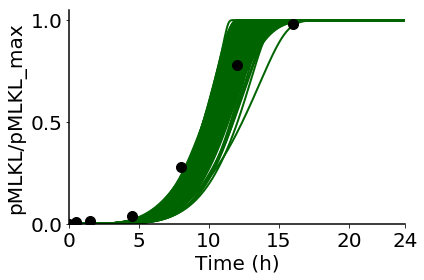

In [5]:
#NEED FOR FIGURE 3B
x = np.array([0, 30, 90, 270,480, 720, 960])
y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882, 0.2798939020159581, .7797294067, 0.98])
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(m4)):
    plt.plot(tspan/60, m4df100wt4.loc[n]['MLKLa_obs'].iloc[:]/5544,
             color = 'darkgreen', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("pMLKL/pMLKL_max", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.set_yticks([0, 0.5, 1.0])
plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode3_pmlkl_allpars_medaquacolor_nogridwdata.pdf')
plt.show() 

In [6]:
thresh = 2772
ttdwt = []
for j in range(len(m4)):
#     print(f"this is output line {j}")
    i_range = range(len(m4df100wt4.loc[j]['MLKLa_obs']))
    for i in i_range:
        if m4df100wt4.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdwt.append(m4df100wt4.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdwt.append(np.inf)
for i in range(len(ttdwt)):
    if ttdwt[i] == np.inf:
        ttdwt[i] = 2100
# print('TTD = ', m3alldf100wt['time'][idx])        

In [7]:
solvera204 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20clus4 = solvera204.run(initials = {m.A20(brip = None):0},
                         param_values=m4, num_processors = 20)
# a20clus1.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c1parsmod_30hra20ko.h5',include_obs_exprs = True)
c4df100a204 = a20clus4.dataframe

2022-07-25 15:05:06.042 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Simulator created
2022-07-25 15:05:06.050 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Equation mode set to "cython"
2022-07-25 15:05:06.088 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits_moder1r3] Simulation(s) started
2022-07-25 15:05:06.189 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Multi-processor (parallel) mode using 20 processes
2022-07-25 15:06:00.037 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits_moder1r3] All simulation(s) complete
2022-07-25 15:06:00.038 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] SimulationResult constructor started
2022-07-25 15:06:01.128 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] SimulationResult constructor finished


In [8]:
thresh = 2772
ttda20 = []
for j in range(len(m4)):
#     print(f"this is output line {j}")
    i_range = range(len(c4df100a204.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c4df100a204.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttda20.append(c4df100a204.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttda20.append(np.inf)
for i in range(len(ttda20)):
    if ttda20[i] == np.inf:
        ttda20[i] = 2100
# print('TTD = ', m3alldf100wt['time'][idx])  

In [9]:
solvercyld4 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclus4 = solvercyld4.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=m4, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c4df100cyld = cyldclus4.dataframe

2022-07-25 15:07:53.375 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Simulator created
2022-07-25 15:07:53.380 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Equation mode set to "cython"
2022-07-25 15:07:53.416 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits_moder1r3] Simulation(s) started
2022-07-25 15:07:53.516 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Multi-processor (parallel) mode using 20 processes
2022-07-25 15:08:49.493 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits_moder1r3] All simulation(s) complete
2022-07-25 15:08:49.495 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] SimulationResult constructor started
2022-07-25 15:08:50.605 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] SimulationResult constructor finished


In [10]:
thresh = 2772
ttdcyld4 = []
for j in range(len(m4)):
#     print(f"this is output line {j}")
    i_range = range(len(c4df100cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c4df100cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdcyld4.append(c4df100cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdcyld4.append(np.inf)
# for i in range(len(ttdcyld2)):
#     if ttdcyld2[i] == np.inf:
#         ttdcyld2[i] = 2100
for i in range(0, 118):
    if ttdcyld4[i] == np.inf:
        ttdcyld4[i] = 2100
for i in range(118, 236):
    if ttdcyld4[i] == np.inf:
        ttdcyld4[i] = 2110
for i in range(236,354):
    if ttdcyld4[i] == np.inf:
        ttdcyld4[i] = 2120
for i in range(354,473):
    if ttdcyld4[i] == np.inf:
        ttdcyld4[i] = 2130
# for i in range(400,473):
#     if ttdcyld4[i] == np.inf:
#         ttdcyld4[i] = 2120
# for i in range(1243,1492):
#     if ttdcyld2[i] == np.inf:
#         ttdcyld2[i] = 2130
# print('TTD = ', m3alldf100wt['time'][idx])  

In [11]:
solvercylda204 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclusa204 = solvercylda204.run(initials = {m.CYLD(brip=None, btraf = None):0,m.A20(brip = None):0},
                         param_values=m4, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c4df100cylda20 = cyldclusa204.dataframe

2022-07-25 15:12:09.251 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Simulator created
2022-07-25 15:12:09.256 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Equation mode set to "cython"
2022-07-25 15:12:09.291 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits_moder1r3] Simulation(s) started
2022-07-25 15:12:09.385 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] Multi-processor (parallel) mode using 20 processes
2022-07-25 15:13:02.173 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits_moder1r3] All simulation(s) complete
2022-07-25 15:13:02.174 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] SimulationResult constructor started
2022-07-25 15:13:03.231 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits_moder1r3] SimulationResult constructor finished


In [12]:
thresh = 2772
ttdcylda20mod2 = []
for j in range(len(m4)):
#     print(f"this is output line {j}")
    i_range = range(len(c4df100cylda20.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c4df100cylda20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdcylda20mod2.append(c4df100cylda20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdcylda20mod2.append(np.inf)
for i in range(0, 124):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2070
for i in range(124, 248):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2080
for i in range(248, 497):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2090
for i in range(497,745):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2100
for i in range(745,994):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2110
for i in range(994,1243):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2120
for i in range(1243,1492):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2130
# print('TTD = ', m3alldf100wt['time'][idx])  

In [20]:
mode1df = pd.DataFrame({'WT': ttdwt, 
                         'A20 KO': ttda20,
                          'CYLD KO': ttdcyld4,
                       'CYLD;A20 DKO': ttdcylda20mod2})
dfclus4 = pd.DataFrame(data = mode1df, columns = ['WT','A20 KO', 'CYLD KO', 'CYLD;A20 DKO'])
dfclus4 = pd.melt(dfclus4)

In [ ]:
dfclus0n.to_csv("mode1_allparsdf_wmodttds.csv")

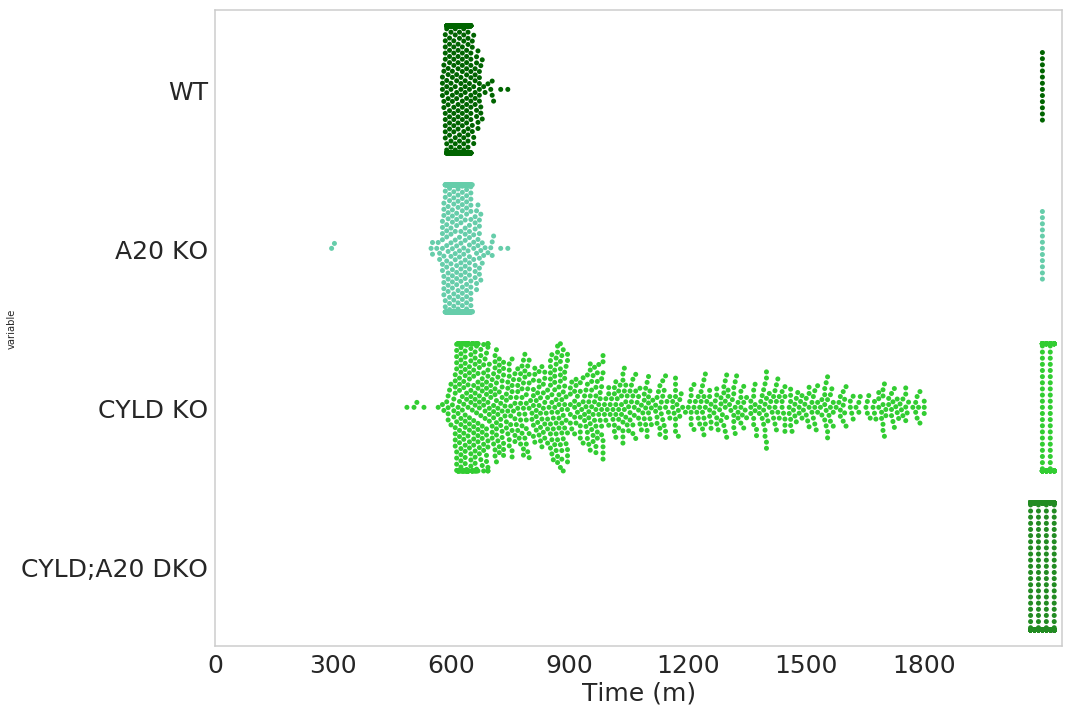

In [22]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "darkgreen", "CYLD KO": "limegreen", "A20 KO":"mediumaquamarine", 'CYLD;A20 DKO': 'forestgreen'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus4, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.savefig('pmlkl_cylda20dko_100tnf_mode3_swarm_greencolors_ttdupdated_mod.pdf')
plt.show()